In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Step 1: Business and Data Understanding** ##

**Problem Statement**
Dataset contains a summary of various customers of said company for certain high volumn products from the previous month. Summary contains information such as:
- Customer demographics (age, gender, marital status, city_type, current loc)
- Product details (product id, product category)
- Total purchase amount from the previous month

The goal is to undestand customer purchase behaviour (specificially, their purchase amount) for different product categories based on a given set of independent variables.

**Variable(_Definition_)**

**Proposed input (explanatory/independent) variables:**
1. Gender (_M/F, gender of the customer for the transaction_)
2. Age (_0-99, integer age range of the customer_)
3. Occupation (_0-20, masked integer value representing customer's occupation_)
4. City_Category (_A,B,C represnting different category of a city the customer is residing in_)
5. Stay_In_Current_City_Years (_0-4+, no. of years customer lived in the city_)
6. Marital_Status (_0 or 1, 0 for 'not married' and 1 for 'married'_)

In [2]:
# importing the training dataset for dataset exploration
blackfri_train = pd.read_csv('train.csv')

# initial data exploration showing first 5 rows of the dataset
blackfri_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# understanding full training data - (no. of rows, no. of columns)
blackfri_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
# statistical snapshot of the black friday training dataset
# dropping columns with redundant statistical descriptions
blackfri_train.drop(columns=['User_ID',
                            'Product_ID']).describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64


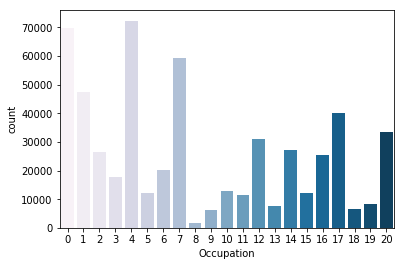

In [5]:
# understanding the min-max and unique values of Occupation variable
occupation = blackfri_train.Occupation.value_counts().sort_index()
print(occupation)
sns.countplot(x='Occupation', data=blackfri_train, palette='PuBu')

## value range between 1 - 20, with frequency counts

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
0    324731
1    225337
Name: Marital_Status, dtype: int64


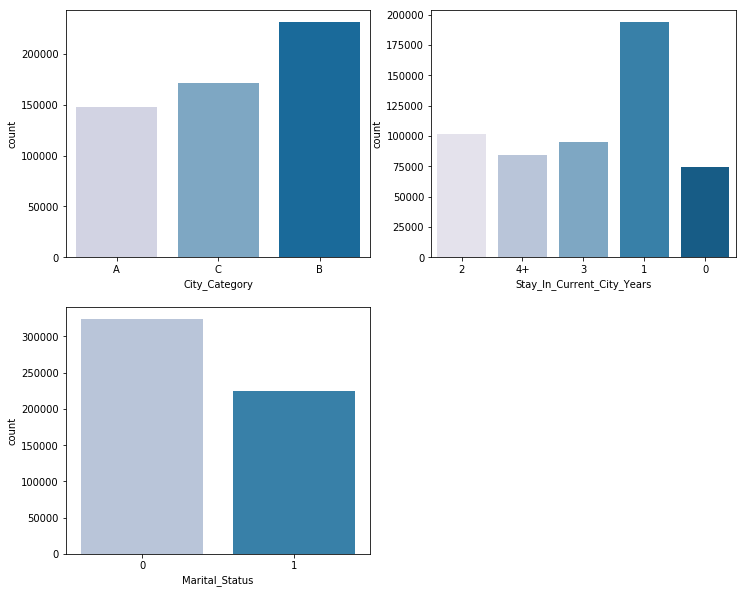

In [8]:
# building subplots
plt.figure(figsize= (12, 10)) #breadth, height

# understanding values in City_Category variable
city_cat = blackfri_train.City_Category.value_counts().sort_index()
print(city_cat)
plt.subplot(2,2,1) #nrows, ncols, index
sns.countplot(x='City_Category',
              data=blackfri_train,
              palette='PuBu')


# Exploring categorical data - years stayed in current city
city_stay_duration = blackfri_train.Stay_In_Current_City_Years.value_counts()
print(city_stay_duration)
plt.subplot(2,2,2) #nrows, ncols, index
sns.countplot(x='Stay_In_Current_City_Years',
              data=blackfri_train,
              palette='PuBu')
## '+' in '4+' might pose as a problem when used as an explanatory (or independent) variable later, need to deal with this.


# Exploring marital_status, 0=Not Married, 1=Married
marital_status = blackfri_train.Marital_Status.value_counts()
print(marital_status)
plt.subplot(2,2,3) #nrows, ncols, index
sns.countplot(x='Marital_Status',
              data=blackfri_train,
              palette='PuBu')

## **Step 2: Data Preparation** ##